# Import the data from my Google drive

In [1]:
"""
This Jupiter notebook is for my custom dataset

Author: Thomas Roethenbaugh
Date: 2025-03-29
Version: 1.4
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Mounting my google drive to pull in the datasets
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


# List of the csv files to be imported and merged
files = [
    #"/content/drive/MyDrive/DDoSTraffic.csv",
    #"/content/drive/MyDrive/DDoSTraffic2.csv",
    "/content/drive/MyDrive/DDoSTraffic2(DDOSLabel).csv",
    #"/content/drive/MyDrive/DDoSTraffic(ddoslabel).csv",
    "/content/drive/MyDrive/BenginTraffic.csv",

]

# NOTE! The other files that are commented out above are other versions of the
# dataset. A lot of data rows were collected (nearly 500,000) however, it there
# were far more DDoS rows than benign. As a result I had to select a chunk of
# each type of attack. I've kept it here for testing.


Mounted at /content/drive/


# Data cleaning

## merge files into dataset

In [2]:
merged_data = [] # merged data in one framw

for file in files:
    dataframe = pd.read_csv(file)
    merged_data.append(dataframe)

# Combine all the dataframes
merged_data = pd.concat(merged_data, ignore_index=True) # This is the merged dataset
print("Merged data shape", merged_data.shape)

Merged data shape (194284, 8)


## Remove duplicates

In [3]:
# Show shape before and after removing duplicates
print(merged_data.shape, "Training shape before")
print(merged_data.duplicated().sum(), "duplicate rows to remove")
merged_data.drop_duplicates(inplace=True)
merged_data.reset_index(inplace=True, drop=True)
print(merged_data.shape, "Training shape after")


(194284, 8) Training shape before
43078 duplicate rows to remove
(151206, 8) Training shape after


## order by labels

In [4]:
# sort
merged_data.sort_values(by=['label'])

,duration,flow_count,CPWE,CPRF,RFPSD,RFBSD,CFER,label
151205,0.742151,3,1.00000,14.372636,1.885618,140.949952,0,Benign
130391,1.633086,3,1.00000,6.531601,3.399346,400.776191,1,Benign
130392,0.957179,3,0.99718,11.143860,2.624669,204.486892,0,Benign
130393,1.124931,3,1.00000,9.482062,1.247219,92.182187,0,Benign
130394,1.491368,4,1.00000,5.364202,3.162278,318.866253,0,Benign
...,...,...,...,...,...,...,...,...
50403,0.000045,30,0.00000,23797.469504,0.249444,11.973304,27,DDOS
50404,0.000051,31,0.00000,20231.794995,0.176685,8.480865,0,DDOS
50405,0.000027,26,0.00000,45683.365555,0.575640,27.630701,7,DDOS
50389,0.000050,9,0.00000,71014.670900,1.706921,81.932221,7,DDOS


# Data analysis / graphs

In [5]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151206 entries, 0 to 151205
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   duration    151206 non-null  float64
 1   flow_count  151206 non-null  int64  
 2   CPWE        151206 non-null  float64
 3   CPRF        151206 non-null  float64
 4   RFPSD       151206 non-null  float64
 5   RFBSD       151206 non-null  float64
 6   CFER        151206 non-null  int64  
 7   label       151206 non-null  object 
dtypes: float64(5), int64(2), object(1)
memory usage: 9.2+ MB
None


## Remove rows for performence

In [6]:
print(merged_data.shape)
"""
for index, row in merged_data.iterrows():
    if row['label'] == 'UDPFlood':
      merged_data.drop(index, inplace=True)
    if row['label'] == 'LDAP':
      merged_data.drop(index, inplace=True)
    if row['label'] == 'Portmap':
      merged_data.drop(index, inplace=True)
    if row['label'] == 'UDPLag':
      merged_data.drop(index, inplace=True)
    #if row['label'] == 'SYN':
    #  merged_data.drop(index, inplace=True)
"""
print(merged_data.shape)


(151206, 8)
(151206, 8)


## Graphs to show distrutions of data

In [7]:
import seaborn as sns
"""
# Frequency Distribution (Bar Plot)
plt.figure(figsize=(12,6)) # size of visual representaion
sns.countplot(data=merged_data, x=categorical_column, order = merged_data[categorical_column].value_counts().index) # Order by frequency
plt.title(f'Frequency Distribution of {categorical_column} (Training Data)')
plt.xlabel(categorical_column)
plt.ylabel('Frequency (Count)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
"""

"\n# Frequency Distribution (Bar Plot)\nplt.figure(figsize=(12,6)) # size of visual representaion\nsns.countplot(data=merged_data, x=categorical_column, order = merged_data[categorical_column].value_counts().index) # Order by frequency\nplt.title(f'Frequency Distribution of {categorical_column} (Training Data)')\nplt.xlabel(categorical_column)\nplt.ylabel('Frequency (Count)')\nplt.xticks(rotation=45, ha='right')\nplt.tight_layout()\nplt.show()\n"

Show bengin vs DDoS traffic distribution

(151206, 8)




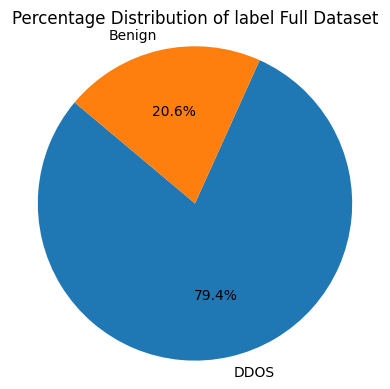

In [8]:
# merge testing training data
print(merged_data.shape)

print("\n")

categorical_column = 'label' # Specify the categorical column to visualize

"""
#### CONVERT LABELS TO DDOS AND BENIGN ONLY ####
for index, row in merged_data.iterrows():
    if row['Label'] == 'NTP':
        merged_data.at[index, 'Label'] = 'DDOS'
    if row['Label'] == 'TFTP':
        merged_data.at[index, 'Label'] = 'DDOS'
    if row['Label'] == 'Syn':
        merged_data.at[index, 'Label'] = 'DDOS'
    if row['Label'] == 'UDP':
        merged_data.at[index, 'Label'] = 'DDOS'
    if row['Label'] == 'MSSQL':
        merged_data.at[index, 'Label'] = 'DDOS'
    if row['Label'] == 'UDP-lag':
        merged_data.at[index, 'Label'] = 'DDOS'
    if row['Label'] == 'DNS':
        merged_data.at[index, 'Label'] = 'DDOS'
    if row['Label'] == 'LDAP':
        merged_data.at[index, 'Label'] = 'DDOS'
    if row['Label'] == 'SNMP':
        merged_data.at[index, 'Label'] = 'DDOS'
    if row['Label'] == 'NetBIOS':
        merged_data.at[index, 'Label'] = 'DDOS'
    if row['Label'] == 'Portmap':
        merged_data.at[index, 'Label'] = 'DDOS'


merged_data = merged_data.drop('Traffic_Category', axis=1)
"""


# Percentage Distribution (Pie Chart)
label_counts = merged_data[categorical_column].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Percentage Distribution of {categorical_column} Full Dataset')
plt.axis('equal')
plt.tight_layout()
plt.show()


# Training / testing of ML models

## Import all required packages

In [9]:
# ML Model Testing and Analysis Section
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import time

## Encode string column types into ints for the ML models

In [10]:
## REUSED CODE FROM THE DDos-data-manipulation NOTEBOOK ##
# Identify categorical columns (object or string dtypes)
categorical_columnss = merged_data.select_dtypes(include=['object', 'string']).columns.tolist()
print(f"\nCategorical columns found: {categorical_columnss}")


# Handle the target variable
# Check if 'Label' is in the dataset
if 'label' in merged_data.columns:
    print("\nUnique values in the Label column:")
    print(merged_data['label'].value_counts())

    data_percentage = merged_data['label'].value_counts('Bengin')

    percent = (len(data_percentage) / len(data_percentage)) * 100

    print(percent)


    # Separate features and target
    X = merged_data.drop('label', axis=1)
    y = merged_data['label']

    # Encode the target variable to see if it's an object or string
    if y.dtype == 'object' or y.dtype == 'string':
        label_encoder = LabelEncoder()
        y = label_encoder.fit_transform(y)
        print("\nTarget variable encoded. Mapping:")
        for i, label in enumerate(label_encoder.classes_):
            print(f"{label} -> {i}")
else:
    print("Error: 'label' column not found in the dataset.")
    # If no Label column, check expected column names
    print("Available columns:", merged_data.columns.tolist())

print(X.shape, y.shape)
print(merged_data.info())
print(merged_data.shape)


Categorical columns found: ['label']

Unique values in the Label column:
label
DDOS      119997
Benign     31209
Name: count, dtype: int64
100.0

Target variable encoded. Mapping:
Benign -> 0
DDOS -> 1
(151206, 7) (151206,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151206 entries, 0 to 151205
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   duration    151206 non-null  float64
 1   flow_count  151206 non-null  int64  
 2   CPWE        151206 non-null  float64
 3   CPRF        151206 non-null  float64
 4   RFPSD       151206 non-null  float64
 5   RFBSD       151206 non-null  float64
 6   CFER        151206 non-null  int64  
 7   label       151206 non-null  object 
dtypes: float64(5), int64(2), object(1)
memory usage: 9.2+ MB
None
(151206, 8)


## split the data 80/20 for ML

In [11]:
# Remove any remaining categorical columns from features
# that shouldn't be used in the model
X_cleaned = X.copy()
for col in categorical_columnss:
    if col in X_cleaned.columns and col != 'label':
        print(f"Removing categorical column '{col}' from features")
        X_cleaned = X_cleaned.drop(col, axis=1)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y, test_size=0.2, random_state=42, stratify=y # 0.2
)


## scale features and initalise the ML models that will be used

In [12]:
# scaleall the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models into a list with values tested for accuracy
# and performence
models = {
    "Decision Tree": DecisionTreeClassifier(
        max_depth=3, # 15
        #min_samples_split=5,
        #min_samples_leaf=2,
        random_state=1
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100, # 100
        max_depth=3, # 15
        #min_samples_split=5, # 5
        #min_samples_leaf=2, # 2
        random_state=1, # 42
        n_jobs=-1
    ),

    "KNN": KNeighborsClassifier(
        n_neighbors=5,
        weights='distance',
        algorithm='auto',
        n_jobs=-1
    )
}

# Dictionary to store the results
results = {
    'Model': [],
    'Training Time (s)': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': [],
    'CV Score': []
}

## Train each model on the dataset

In [13]:
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training and evaluating {name}...")

    # Train the model with timing to show how long it took to train
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # For models that support probability predictions
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test_scaled)
    #else:
        # For SVM without probability=True
     #   y_pred_proba = None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate ROC AUC for multi-class
    if y_pred_proba is not None:
        try:
            roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
        except:
            roc_auc = np.nan
    else:
        roc_auc = np.nan

    # Perform cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='f1_weighted')
    cv_mean = cv_scores.mean()

     # Store the results
    results['Model'].append(name)
    results['Training Time (s)'].append(training_time)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    results['ROC AUC'].append(roc_auc)
    results['CV Score'].append(cv_mean)


    # print the stored results to check performence
    print(f"{name} Results:")
    print(f"Training Time: {training_time:.2f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if not np.isnan(roc_auc):
        print(f"ROC AUC: {roc_auc:.4f}")

    print(f"Cross-Validation Score (F1): {cv_mean:.4f} (std: {cv_scores.std():.4f})")

# results DataFrame and sort by the F1 score
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1 Score', ascending=False).reset_index(drop=True)

print("\nModel Comparison:")
print(results_df)

# Save the best model
best_model_name = results_df.loc[0, 'Model']
best_model = models[best_model_name]
print(f"\nBest performing model based on F1 Score is: {best_model_name}")

import pickle

best_model.fit(X, y)

# save
with open('/content/drive/MyDrive/trainedCustomModel.pkl','wb') as f:
    pickle.dump(best_model,f)

# load
#with open('model.pkl', 'rb') as f:
#    clf2 = pickle.load(f)



Training and evaluating Decision Tree...
Decision Tree Results:
Training Time: 0.15 seconds
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Cross-Validation Score (F1): 1.0000 (std: 0.0000)

Training and evaluating Random Forest...
Random Forest Results:
Training Time: 4.76 seconds
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Cross-Validation Score (F1): 1.0000 (std: 0.0000)

Training and evaluating KNN...
KNN Results:
Training Time: 0.28 seconds
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Cross-Validation Score (F1): 1.0000 (std: 0.0000)

Model Comparison:
           Model  Training Time (s)  Accuracy  Precision  Recall  F1 Score  \
0  Decision Tree           0.152181       1.0        1.0     1.0       1.0   
1  Random Forest           4.760997       1.0        1.0     1.0       1.0   
2            KNN           0.277966       1.0        1.0     1.0       1.0   

   ROC AUC  CV Score  
0      NaN  0.999983  
1      NaN  

## random forrest feature importance


Best performing model based on F1 Score is: Random Forest

Important Features:


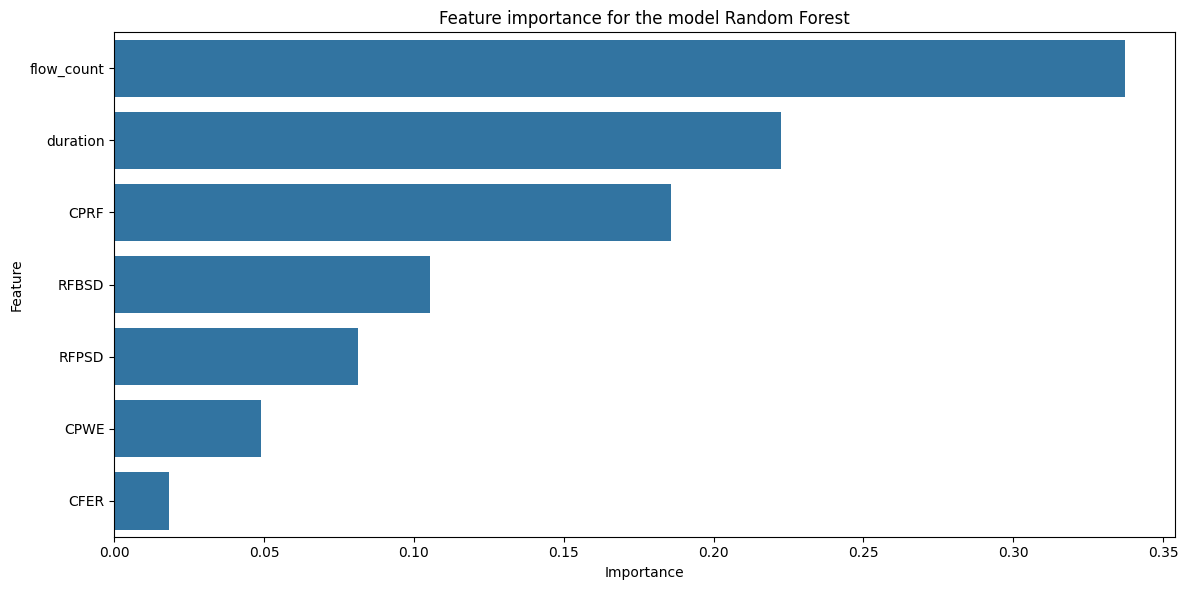

      Feature  Importance
1  flow_count    0.337227
0    duration    0.222548
3        CPRF    0.185926
5       RFBSD    0.105545
4       RFPSD    0.081489
2        CPWE    0.048905
6        CFER    0.018360


In [14]:
# Save the best model
best_model_name = results_df.loc[1, 'Model']
best_model = models[best_model_name]
print(f"\nBest performing model based on F1 Score is: {best_model_name}")

# Feature importance for radom forrest
if best_model_name in ["Random Forest"]:
    print("\nImportant Features:")
    feature_importance = best_model.feature_importances_

    # Create a DataFrame for feature importance
    importance_df = pd.DataFrame({
        'Feature': X_cleaned.columns,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=False).head(34)

    # Plot feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f'Feature importance for the model {best_model_name}')
    plt.tight_layout()
    plt.show()

    print(importance_df)

## Ensamble voting

In [15]:
# Import ensemble classes for classification
from sklearn.ensemble import VotingClassifier


voting_estimators = [

    ('decisiontree', DecisionTreeClassifier(
        max_depth=15, # 15
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=1)),

    ('randomforrest', RandomForestClassifier(n_estimators=100 , # 100
                                  max_depth=15, # 15
                                  min_samples_split= 5, # 5
                                   min_samples_leaf=2,
                                  random_state=1, # 42
                                  n_jobs=-1)),

    ('knearest', KNeighborsClassifier(n_neighbors=5, # 5
                                 weights='distance',
                                 n_jobs=-1))

]

# VotingClassifier with soft voting ( with averaging the predicted probabilities)
voting_clf = VotingClassifier(
    estimators=voting_estimators,
    voting='hard',
    n_jobs=-1)

# Train the Voting Classifier
start_time = time.time()
voting_clf.fit(X_train_scaled, y_train)
voting_training_time = time.time() -start_time

# Predict on the test datset
voting_pred = voting_clf.predict(X_test_scaled)

# Calculate performance metrics
voting_accuracy = accuracy_score(y_test, voting_pred )
voting_precision = precision_score(y_test, voting_pred, average='weighted')
voting_recall = recall_score(y_test, voting_pred, average='weighted')
voting_f1 = f1_score(y_test, voting_pred, average='weighted')

# If probabilities are available, calculate ROC AUC
if hasattr(voting_clf, "predict_proba"):
    voting_pred_proba = voting_clf.predict_proba(X_test_scaled)

    try:
        voting_roc_auc = roc_auc_score(y_test, voting_pred_proba, multi_class='ovr')
    except Exception as e:
        voting_roc_auc = np.nan
else:
    voting_roc_auc = np.nan

# Print results
print("Voting Classifier Results:")
print(f"Training Time: {voting_training_time:.2f} seconds")
print(f"Accuracy:{voting_accuracy:.4f}")
print(f"Precision: {voting_precision:.4f}")
print(f"Recall: {voting_recall:.4f}")
print(f"F1 Score: {voting_f1:.4f}")

Voting Classifier Results:
Training Time: 8.97 seconds
Accuracy:1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
